In [1]:
import pickle
from vectorizers import *
from language_models import *
from translation_models import *
from decoders import *

In [2]:
# The files example_ibm1.pickle, example_ibm2.pickle, example_bigram.pickle, and example_vectorizer.pickle 
# contain several models trained on a corpus of 45_000 aligned French and English strings.

# tm1 is an IBM1 translation model
# tm2 is an IBM2 translation model
# lm is a bigram language model
# v is a Vectorizer object

with open('./example_models/example_ibm1.pickle', 'rb') as handle:
    tm1 = pickle.load(handle)
    
with open('./example_models/example_ibm2.pickle', 'rb') as handle:
    tm2 = pickle.load(handle)
    
with open('./example_models/example_bigram.pickle', 'rb') as handle:
    lm = pickle.load(handle)
    
with open('./example_models/example_vectorizer.pickle', 'rb') as handle:
    v = pickle.load(handle)

In [3]:
# The decode function takes a string, a translation model, a language model, a vectorizer, and a number n.
# It returns up to n translations, each better than the last.
# Some bad behavior:
### If a word is unknown, the decoder throws an error.
### The decoder is quite slow.

string = 'je pense, donc je suis'

decode(string, tm1, lm, v, 10)

i thinks therefore i am
i think i therefore i am
i think i therefore i
i think i therefore
i therefore i think
therefore i think


In [4]:
decode(string, tm2, lm, v, 10)

i thinks therefore i am
i therefore i am


# Fitting Your Own Model

In [5]:
# Data should be a dictionary of the form {input_language : list_of_strings, output_language : list_of_strings}.
# The file hansards.pickle contains 400_000 aligned French and English strings.
# To facilitate quick learning, we load 5_000.
# For a functional translator, I recommend loading more.

sample_size = 5_000

def load_sample(sample_size):
    with open('hansards.pickle', 'rb') as handle:
        S = pickle.load(handle)
    return {key : S[key][:sample_size] for key in S}

S = load_sample(min(400_000, sample_size))

In [6]:
# First, vectorize and filter the sample.
# Vectorizer instantiates with the arguments sample, output_lanugage, input_language
# The method filter_vectors removes strings that are too short or too long.
# It also removes translated pairs in which one string is much longer than the other.

# Removing long strings makes building an IBM2 model much faster.

v = Vectorizer(S, 'e', 'f')
v.filter_vectors(min_length = 2, max_length = 50, max_ratio = 3)

In [7]:
# Next, we fit a language model.
# At present, there is only one: Bigram.
# A Bigram object instantiates with the argument output_language.
# The method fit takes a Vectorizer object.

lm = Bigram('e')
lm.fit(v)

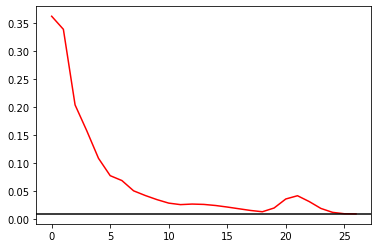

In [8]:
# Third, we fit some translation models.
# IBM models must be fit in order.

# First, we fit an IBM1 translation model.
# An IBM1 object instantiates with the arguments output_language and input_language.
# The method build_model takes a Vectorizer object and a threshold.

tm1 = IBM1('e', 'f')
tm1.build_model(v, threshold = 0.01)

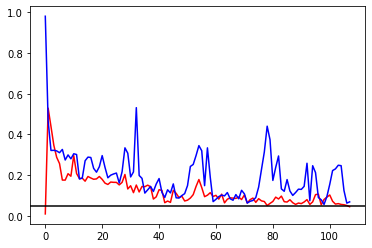

In [12]:
# Next, we fit an IBM2 translation model.
# The build_model method of IBM2 takes a Vectorizer object, an IBM1 object, and a threshold.
# This takes longer to build than the IBM1 model.
# We choose a high threshold to facilitate fast learning.

tm2 = IBM2('e', 'f')
tm2.build_model(v, tm1, threshold = 0.05)

In [13]:
# Finally, we can use our models to translate.
string = 'je pense, donc je suis'
decode(string, tm1, lm, v, 10)

i think therefore i am
i am therefore i think
i am therefore think
i am therefore not think


In [14]:
decode(string, tm2, lm, v, 10)

i auditors therefore i am
i think danger i am
